In [1]:
data <- read.csv("Data_T3.csv")

In [2]:
# a first look at the data
head(data)
summary(data)

,X,ID,TreatmentGroup,Age,Sex,ECOG_PS,GFR,Time,Event
,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>
1,1,1,Treatment,73,Female,2,83,0.6,1
2,2,2,Treatment,62,Male,0,86,6.3,1
3,3,3,Treatment,61,Female,0,98,57.7,0
4,4,4,Treatment,66,Male,1,58,0.7,1
5,5,5,Treatment,88,Female,0,120,30.7,0
6,6,6,Treatment,73,Male,0,55,6.5,1


       X                ID         TreatmentGroup          Age      
 Min.   :  1.00   Min.   :  1.00   Length:300         Min.   :38.0  
 1st Qu.: 75.75   1st Qu.: 75.75   Class :character   1st Qu.:59.0  
 Median :150.50   Median :150.50   Mode  :character   Median :65.0  
 Mean   :150.50   Mean   :150.50                      Mean   :65.3  
 3rd Qu.:225.25   3rd Qu.:225.25                      3rd Qu.:72.0  
 Max.   :300.00   Max.   :300.00                      Max.   :91.0  
     Sex               ECOG_PS            GFR              Time       
 Length:300         Min.   :0.0000   Min.   : 30.00   Min.   : 0.000  
 Class :character   1st Qu.:0.0000   1st Qu.: 66.00   1st Qu.: 2.600  
 Mode  :character   Median :1.0000   Median : 81.00   Median : 5.900  
                    Mean   :0.8167   Mean   : 78.89   Mean   : 9.673  
                    3rd Qu.:1.0000   3rd Qu.: 91.00   3rd Qu.:13.600  
                    Max.   :2.0000   Max.   :120.00   Max.   :57.700  
     Event     
 Min

In [3]:
dim(data)

[1] 300   9

In [4]:
# Load necessary libraries
library(readr)
library(ggplot2)
library(survival)
library(coxme)

library(lubridate)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)

Loading required package: bdsmatrix


Attaching package: ‘bdsmatrix’


The following object is masked from ‘package:base’:

    backsolve



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




ERROR: Error in library(gtsummary): there is no package called ‘gtsummary’


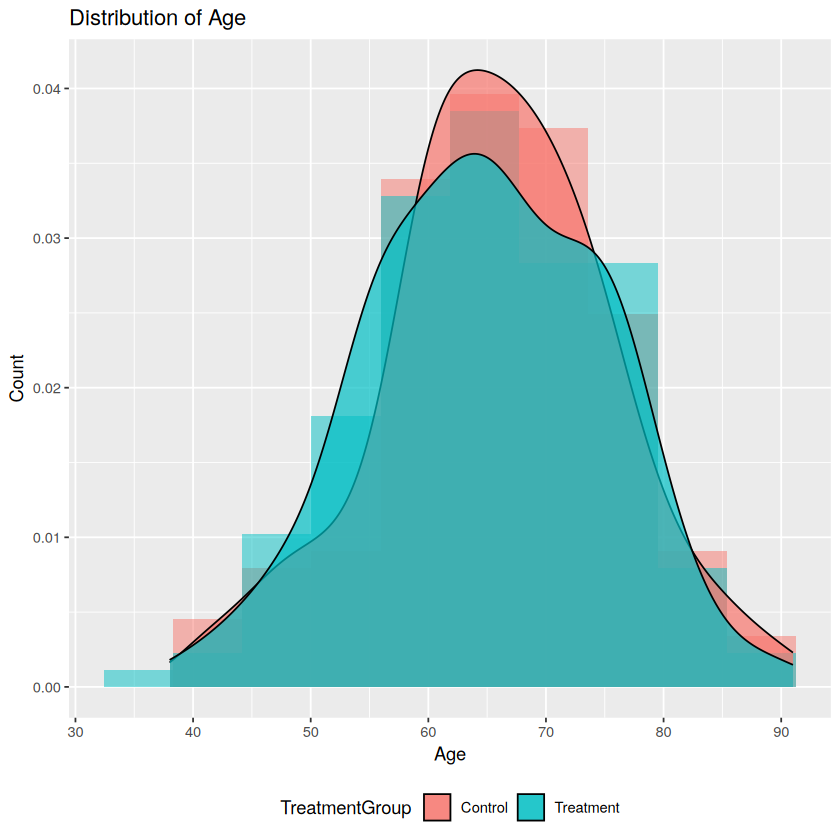

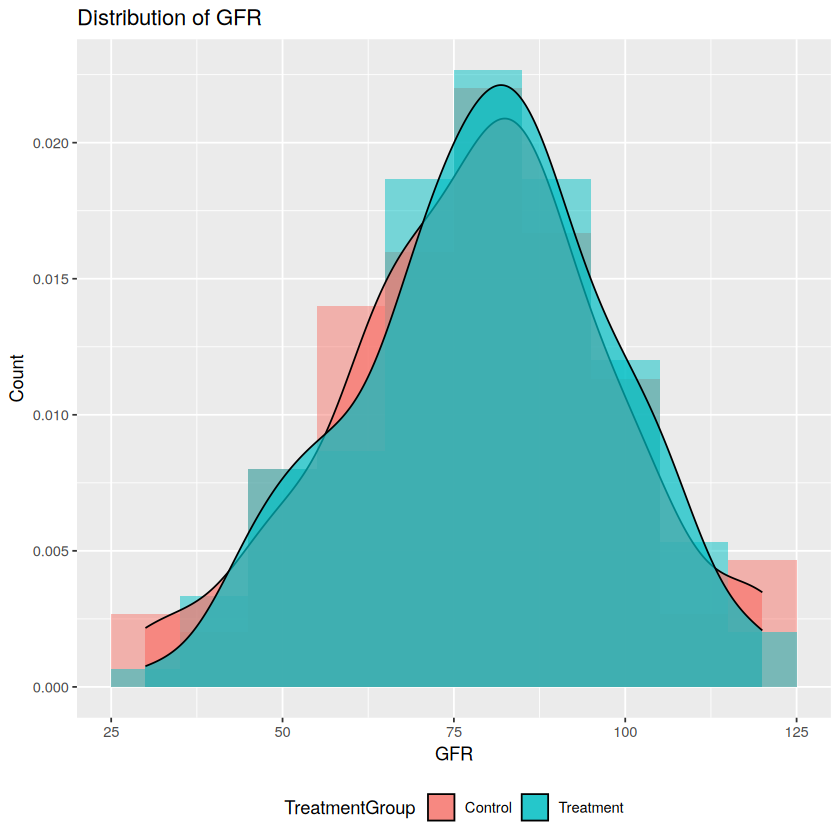

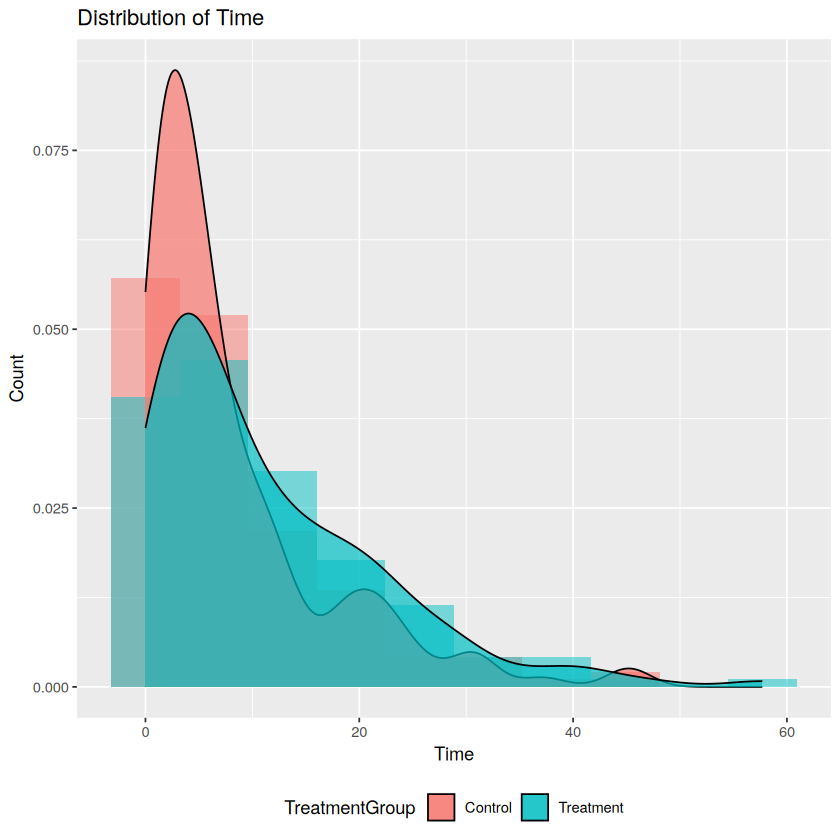

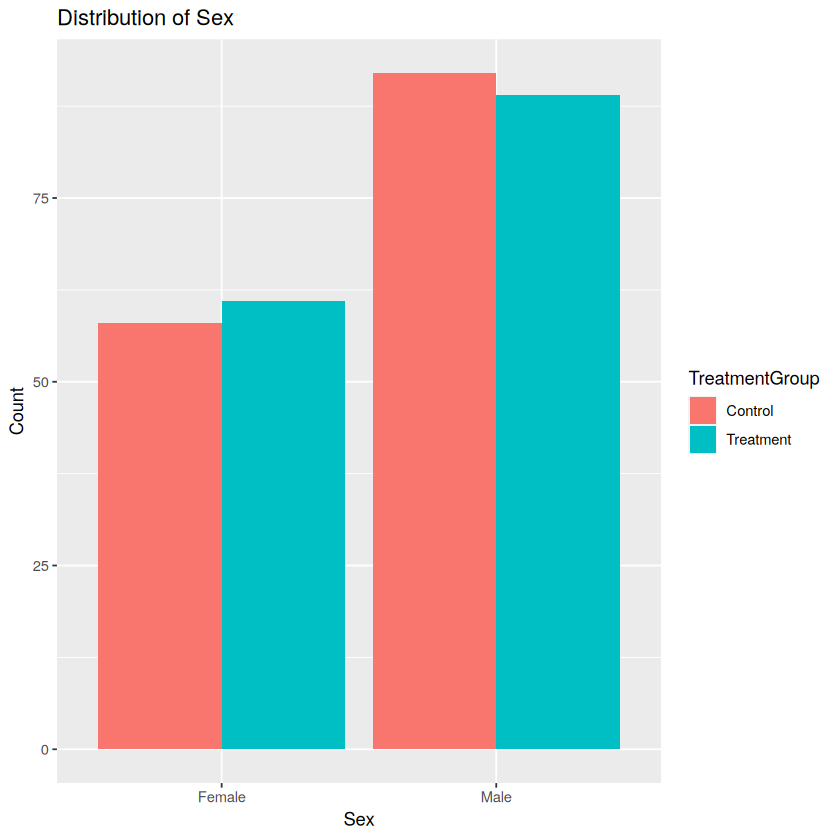

In [ ]:
# Histograms for continuous variables
ggplot(data, aes(x = Age, fill = TreatmentGroup)) + 
 geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Distribution of Age", x = "Age", y = "Count") + 
  theme(legend.position = "bottom")

ggplot(data, aes(x = GFR, fill = TreatmentGroup)) + 
geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Distribution of GFR", x = "GFR", y = "Count") + 
  theme(legend.position = "bottom")

ggplot(data, aes(x = Time, fill = TreatmentGroup)) + 
  geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Distribution of Time", x = "Time", y = "Count") + 
  theme(legend.position = "bottom")

# Bar plots for categorical variables
ggplot(data, aes(x = Sex, fill = TreatmentGroup)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Distribution of Sex", x = "Sex", y = "Count")


ERROR: Error in +add_risktable(): invalid argument to unary operator


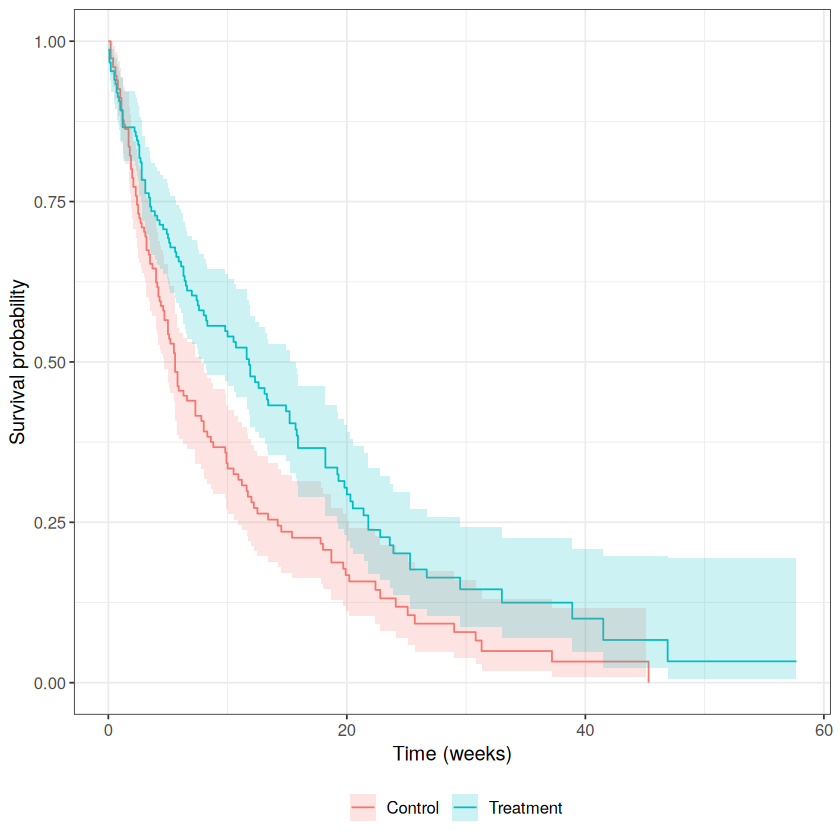

In [ ]:
# Kaplan-Meier survival curves with confidence intervals by treatment group
survfit2(Surv(Time, Event) ~ TreatmentGroup, data = data) |> 
  ggsurvfit() +
  labs(
    x = "Time (weeks)",
    y = "Survival probability"
  ) + 
  add_confidence_interval()
 +
    add_risktable()


In [ ]:
summary(survfit)


Call: survfit(formula = Surv(Time, Event) ~ TreatmentGroup, data = data)

                TreatmentGroup=Control 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.2    150       4   0.9733  0.0132      0.94789        0.999
  0.4    143       2   0.9597  0.0161      0.92866        0.992
  0.6    140       2   0.9460  0.0186      0.91030        0.983
  0.7    138       1   0.9392  0.0197      0.90140        0.978
  0.8    136       2   0.9253  0.0217      0.88385        0.969
  1.0    134       2   0.9115  0.0234      0.86674        0.959
  1.1    132       3   0.8908  0.0258      0.84170        0.943
  1.2    129       2   0.8770  0.0272      0.82535        0.932
  1.3    127       1   0.8701  0.0278      0.81726        0.926
  1.4    126       1   0.8632  0.0284      0.80922        0.921
  1.7    125       4   0.8356  0.0307      0.77752        0.898
  1.8    120       2   0.8216  0.0317      0.76176        0.886
  1.9    118       3   0.8008  0.0331      0.73838    

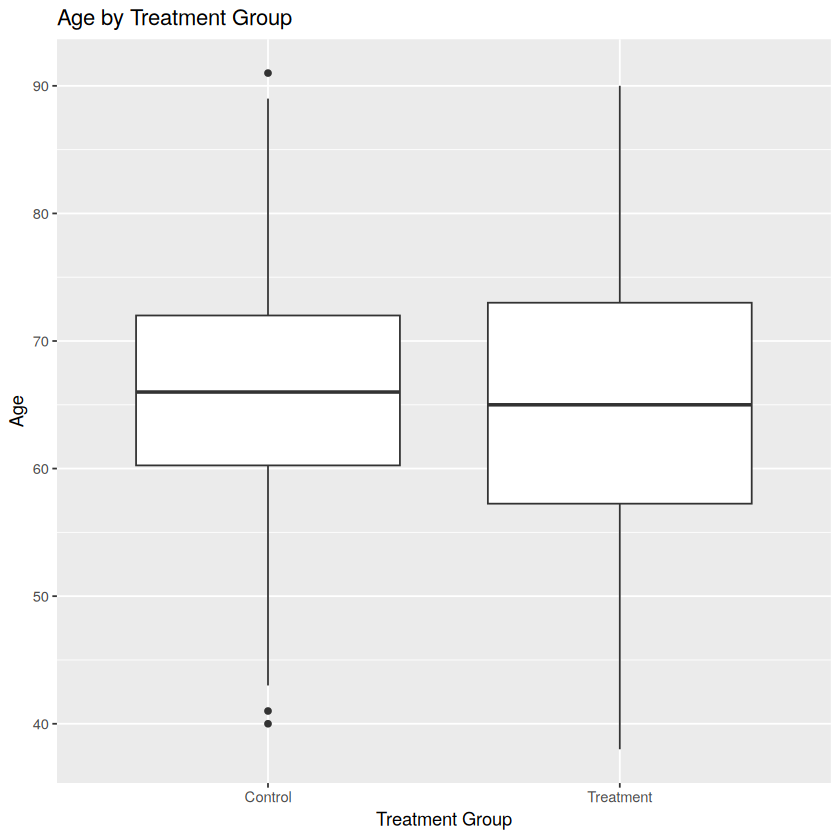

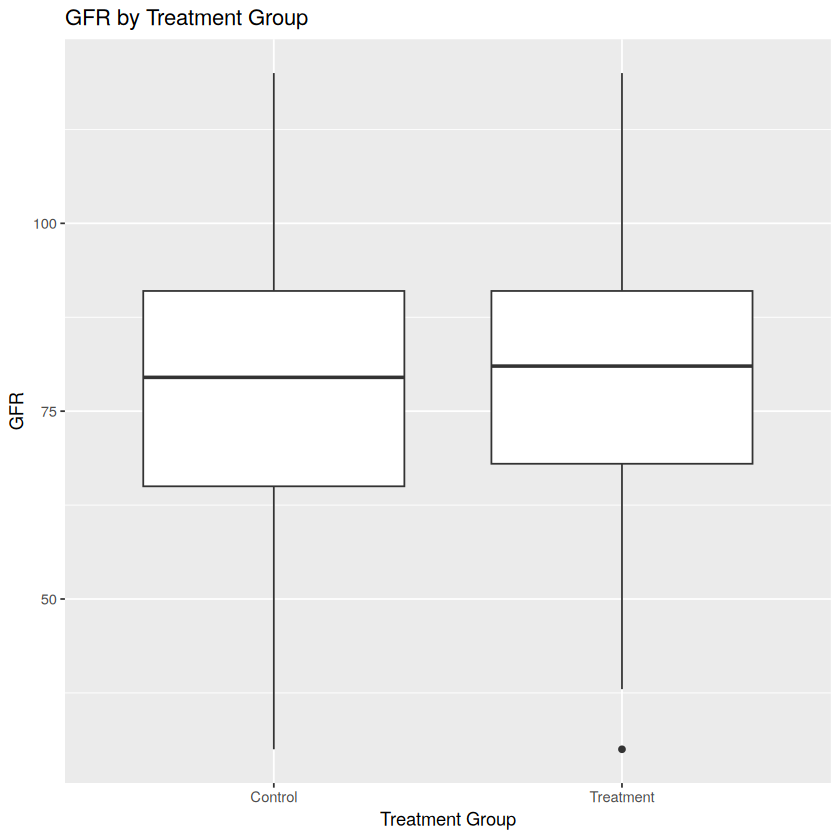

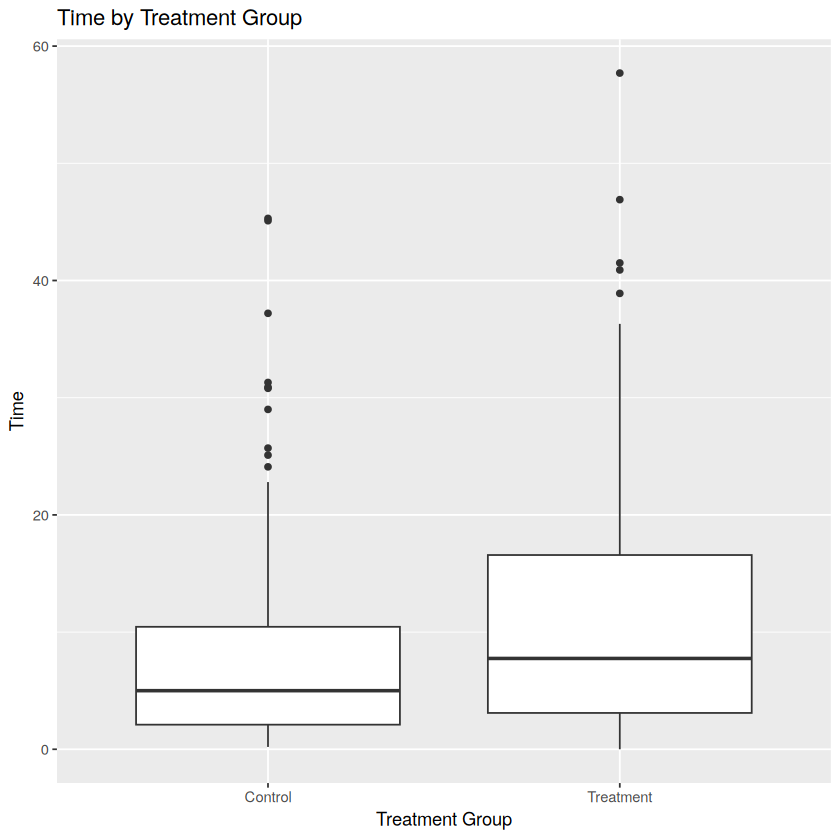

In [ ]:
# Box plots to compare distributions between treatment groups
ggplot(data, aes(x = TreatmentGroup, y = Age)) + 
  geom_boxplot() + 
  labs(title = "Age by Treatment Group", x = "Treatment Group", y = "Age")

ggplot(data, aes(x = TreatmentGroup, y = GFR)) + 
  geom_boxplot() + 
  labs(title = "GFR by Treatment Group", x = "Treatment Group", y = "GFR")

ggplot(data, aes(x = TreatmentGroup, y = Time)) + 
  geom_boxplot() + 
  labs(title = "Time by Treatment Group", x = "Treatment Group", y = "Time")


In [ ]:
# Fit the Cox PH model
cox_model <- coxph(Surv(Time, Event) ~ TreatmentGroup + Age + Sex + ECOG_PS + GFR, data = data)

# Summarize the model
summary(cox_model)


Call:
coxph(formula = Surv(Time, Event) ~ TreatmentGroup + Age + Sex + 
    ECOG_PS + GFR, data = data)

  n= 300, number of events= 228 

                             coef exp(coef)  se(coef)      z Pr(>|z|)    
TreatmentGroupTreatment -0.525216  0.591428  0.138716 -3.786 0.000153 ***
Age                     -0.010326  0.989727  0.006697 -1.542 0.123080    
SexMale                 -0.086113  0.917490  0.137160 -0.628 0.530115    
ECOG_PS                  0.444375  1.559514  0.091175  4.874 1.09e-06 ***
GFR                     -0.013653  0.986439  0.003674 -3.716 0.000202 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
TreatmentGroupTreatment    0.5914     1.6908    0.4506    0.7762
Age                        0.9897     1.0104    0.9768    1.0028
SexMale                    0.9175     1.0899    0.7012    1.2005
ECOG_PS                    1.5595     0.6412    1.3043    1.8647
GFR                     